# The Sparks Foundation - Data Science & Business Analytics Internship

# TASK 1 - Prediction Using Supervised Machine Learning

Here we are predicting the percentage score of a student on the basis of number of hours studied using the Linear Regression supervised machine learning algorithm.

Steps:
    
Step 1 - Importing the dataset

Step 2 - Visualizing the dataset

Step 3 - Dataset Modification

Step 4 - Training the Algorithm

Step 5 - Visualizing the model

Step 6 - Make predcitions

Step 7 - Evaluate the model


# BY : Kowshik Bharadwaj P V


# STEP 1 - Importing the dataset

In this step, we will import the dataset through the link with the help of pandas library and then we will observe the data

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from the remote link

url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print('Dataset imported successfully')

Dataset imported successfully


In [24]:

# now let's observe the given dataset 
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [25]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [26]:

# To find the number of columns and rows 
df.shape

(25, 2)

In [27]:
# To find more information about given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [29]:
# now we will check if our dataset contains null values  
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# STEP 2 - Visualizing the dataset
In this step we will plot the dataset to check whether we can observe any relation between the two variables

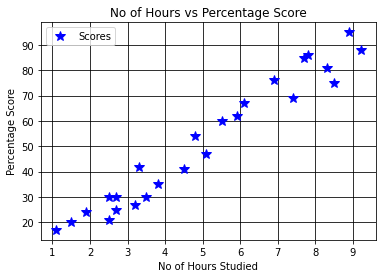

In [30]:
# Plotting the dataset
df.plot(x='Hours', y='Scores', style='*', color='blue', markersize=10)
plt.title('No of Hours vs Percentage Score')  
plt.xlabel('No of Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid(color='black')
plt.show()

# From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [31]:
# we can also use .corr to determine the corelation between the variables 
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# STEP 3 - Dataset Modification
In this step we will divide the dataset into "attributes" (inputs) and "labels" (outputs).

After that we will split the whole dataset into 2 parts - testing data and training data.

In [56]:
# using iloc function we will divide the dataset 
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1:].values

In [57]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [58]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [59]:
# Splitting dataset into training and testing data

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# STEP 4 - Training the Algorithm
We have splited the data into training and testing sets, and now is finally the time to train our algorithm.

In [60]:
from sklearn.linear_model import LinearRegression  

regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print("Training complete.")

Training complete.


# STEP 5 - Visualizing the model
After training the model, now its time to visualize it

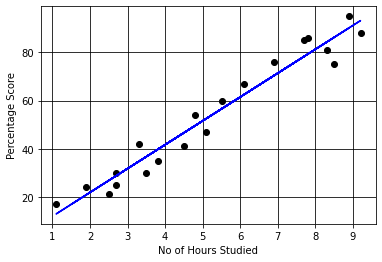

In [37]:
line = regressor.coef_*x + regressor.intercept_

# Plotting for the training data
plt.scatter(X_train, y_train, color='black')
plt.plot(x, line, color='blue');
plt.xlabel('No of Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid(color='black')
plt.show()

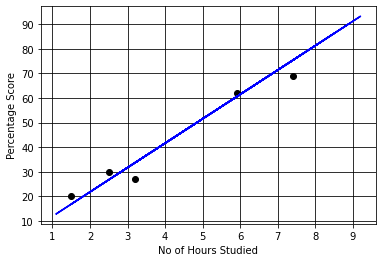

In [38]:
# Plotting for the testing data
plt.scatter(X_test, y_test, color='black')
plt.plot(x, line, color='blue');
plt.xlabel('No of Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid(color='black')
plt.show()

# STEP 6 - Make Predictions
Now we have trained our model,Let us try make some predictions.



In [39]:
y_pred = regressor.predict(X_test) # Predicting the scores
prediction = pd.DataFrame({'No of hours': [i for i in X_test], 'Predicted Scores': [k for k in y_pred]})
prediction

,No of hours,Predicted Scores
0,[1.5],[16.884144762398037]
1,[3.2],[33.73226077948984]
2,[7.4],[75.35701799818723]
3,[2.5],[26.794801243040276]
4,[5.9],[60.491033277223885]


In [40]:
# Comparing Actual vs Predicted
comp = pd.DataFrame({ 'Actual Scores': [i for i in y_test],'Predicted Score': [i for i in y_pred]})
comp

,Actual Scores,Predicted Score
0,[20],[16.884144762398037]
1,[27],[33.73226077948984]
2,[69],[75.35701799818723]
3,[30],[26.794801243040276]
4,[62],[60.491033277223885]


In [50]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = ",hours)
print("Predicted Score = ",(own_pred[0]))

No of Hours =  9.25
Predicted Score =  [93.69173249]


# STEP 7 - Evaluate the model

In the last step, we are going to evaluate our trained model by calculating mean absolute error

In [23]:
from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
